In [98]:
import os
import cv2
import numpy as np
import xml.etree.ElementTree as ET
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
# https://github.com/chenyuntc/simple-faster-rcnn-pytorch/blob/0.4/data/dataset.py
# https://github.com/chainer/chainercv/blob/v0.12.0/chainercv/datasets/voc/voc_bbox_dataset.py#L11

class LoadDataset(Dataset):
    def __init__(self, data_dir, split='train', use_difficult=False, return_difficult=False):
        # data_pth = /VOCdevkit/VOC2007
        id_list_file = os.path.join(data_dir, 'ImageSets/Main/{}.txt'.format(split))
        assert os.path.exists(id_list_file) == True , "file:{} not found.".format(id_list_file)
        with open(id_list_file, 'r') as f:
            id_lines = f.read().splitlines()
        self.ids = id_lines
        self.data_dir = data_dir
        self.use_difficult = use_difficult
        self.return_difficult = return_difficult
        VOC_BBOX_LABEL_NAMES = (
            'aeroplane',
            'bicycle',
            'bird',
            'boat',
            'bottle',
            'bus',
            'car',
            'cat',
            'chair',
            'cow',
            'diningtable',
            'dog',
            'horse',
            'motorbike',
            'person',
            'pottedplant',
            'sheep',
            'sofa',
            'train',
            'tvmonitor')
        self.label_names = VOC_BBOX_LABEL_NAMES
        
    def __len__(self):
        return len(self.ids)
    
    def _get_image(self, i):
        img_path = os.path.join(self.data_dir, 'JPEGImages', i + '.jpg')
        img = cv2.imread(img_path) # BGR, (333, 500, 3)
        assert img is not None, 'File Not Found: {}'.format(img_path)
        return img
    
    def _get_annotations(self, i):
        anno = ET.parse(os.path.join(self.data_dir, 'Annotations', i + '.xml'))
        bbox, label, difficult = [], [], []
        
        for obj in anno.findall('object'):
            # when in not using difficult split, and the object is
            # difficult, skipt it.
            if not self.use_difficult and int(obj.find('difficult').text) == 1:
                continue
            
            difficult.append(int(obj.find('difficult').text))
            bndbox_anno = obj.find('bndbox')
            bbox.append([int(bndbox_anno.find(tag).text)-1 for tag in ('xmin', 'ymin', 'xmax', 'ymax')])
            name = obj.find('name').text.lower().strip()
            label.append(self.label_names.index(name))
            
        bbox = np.stack(bbox).astype(np.float32)
        label = np.stack(label).astype(np.int32)
        difficult = np.array(difficult, dtype=np.bool).astype(np.uint8)
        
        return bbox, label, difficult

    def __getitem__(self, idx):
        indx = self.ids[idx]
        img = self._get_image(indx)
        bbox, label, difficult = self._get_annotations(indx)
        
        return img, bbox, label, difficult

In [88]:
t = 'E:/data/voc07/VOCdevkit/VOC2007'

In [89]:
dataset = LoadDataset(t)

In [90]:
len(dataset)

2501

In [91]:
dataset[0][0].shape

(333, 500, 3)

In [92]:
dataset[0][1]

array([[155.,  96., 350., 269.]], dtype=float32)

In [93]:
dataset[0][2]

array([6])

In [94]:
img = dataset[0][0]

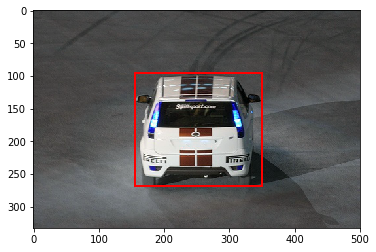

In [96]:
cv2.rectangle(img, (155,96), (350,269), (255,0,0), 2)
plt.imshow(img)
plt.show()

In [97]:
img.shape

(333, 500, 3)